In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

from tqdm import tqdm

In [3]:
df=pd.read_csv(r'C:\Users\Jiao Yuehan\Desktop\IT5006\Project_IT5006\pres\CMAPSSData\train_FD001.txt', delim_whitespace=True, header=None)
df.head()

C:\Users\Jiao Yuehan\AppData\Local\Temp\ipykernel_8324\494565138.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(r'C:\Users\Jiao Yuehan\Desktop\IT5006\Project_IT5006\pres\CMAPSSData\train_FD001.txt', delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
columns

['unit',
 'time',
 'op1',
 'op2',
 'op3',
 'sr1',
 'sr2',
 'sr3',
 'sr4',
 'sr5',
 'sr6',
 'sr7',
 'sr8',
 'sr9',
 'sr10',
 'sr11',
 'sr12',
 'sr13',
 'sr14',
 'sr15',
 'sr16',
 'sr17',
 'sr18',
 'sr19',
 'sr20',
 'sr21']

In [7]:
df.columns=columns
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
df_1=df[df['unit']==1].iloc[:,5:]
df_1.head()

,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,sr10,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


<Axes: >

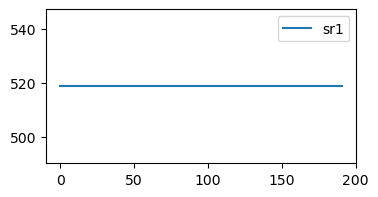

In [21]:
df_1.plot(y='sr1', figsize=(4,2))

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

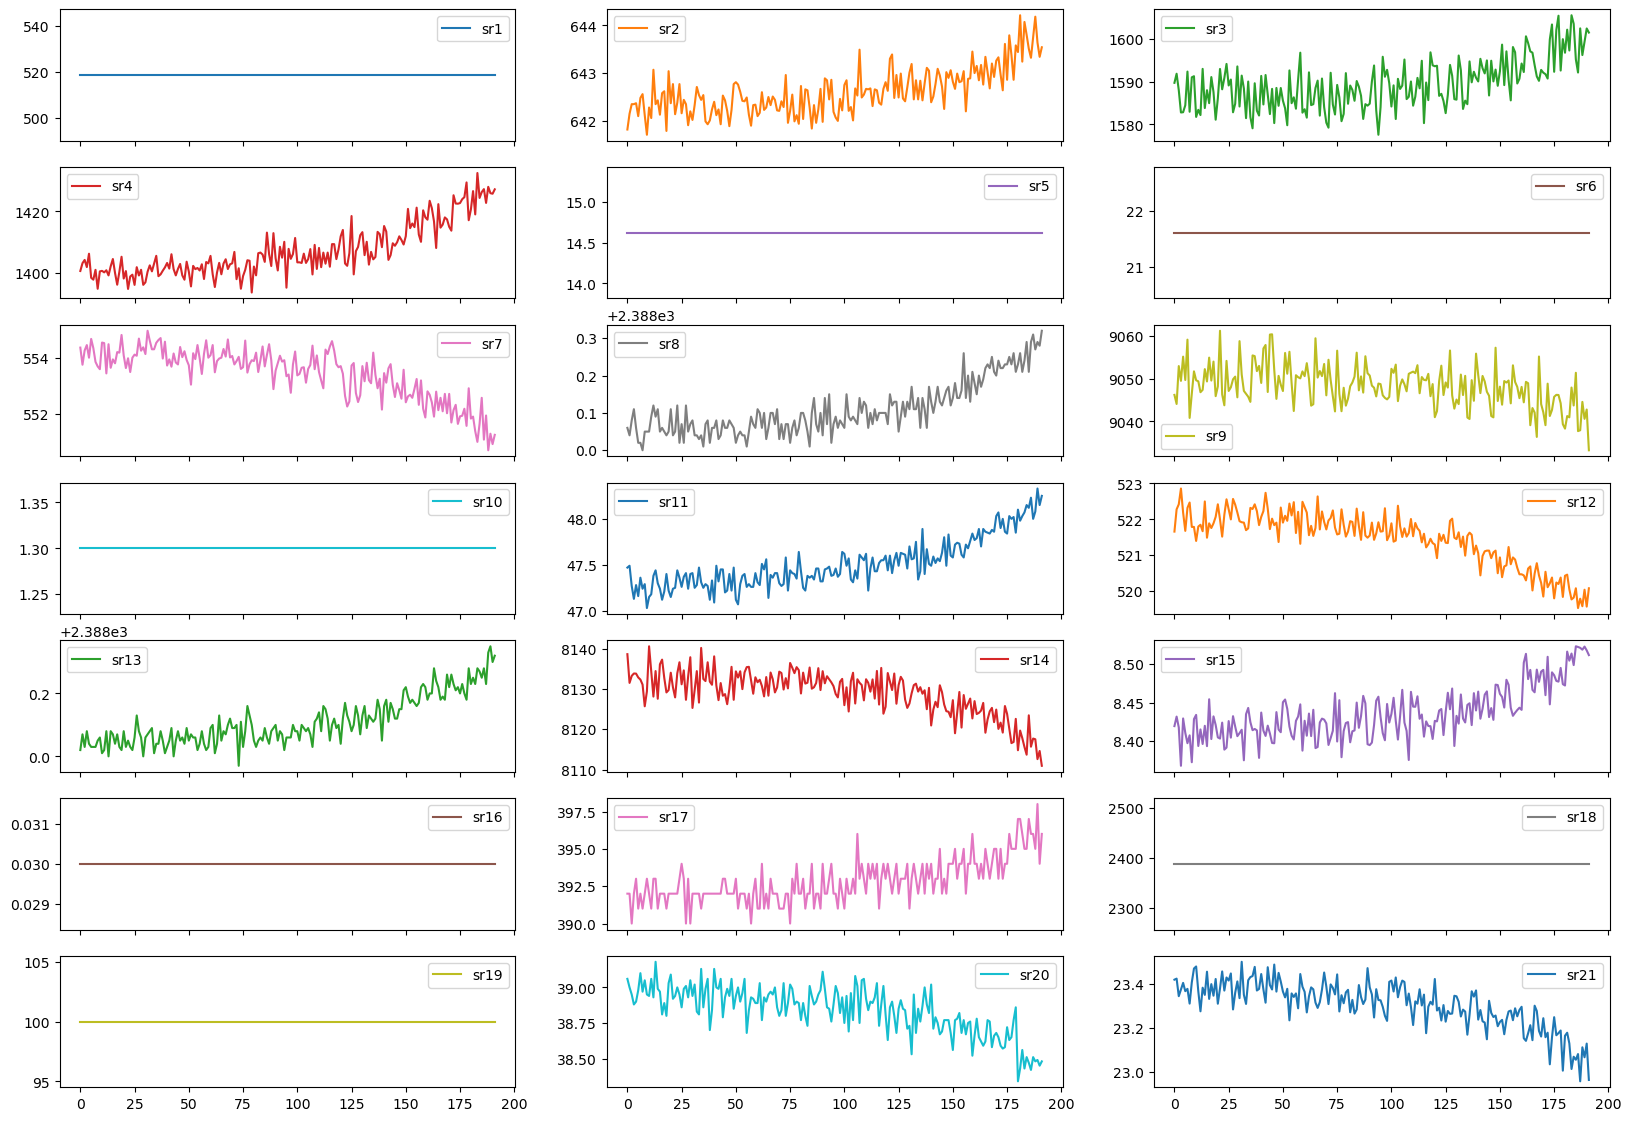

In [27]:
df_1[['sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(7, 3))

In [29]:
df_20=df[df['unit']==1].iloc[:,5:]
df_20.head()

,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,sr10,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

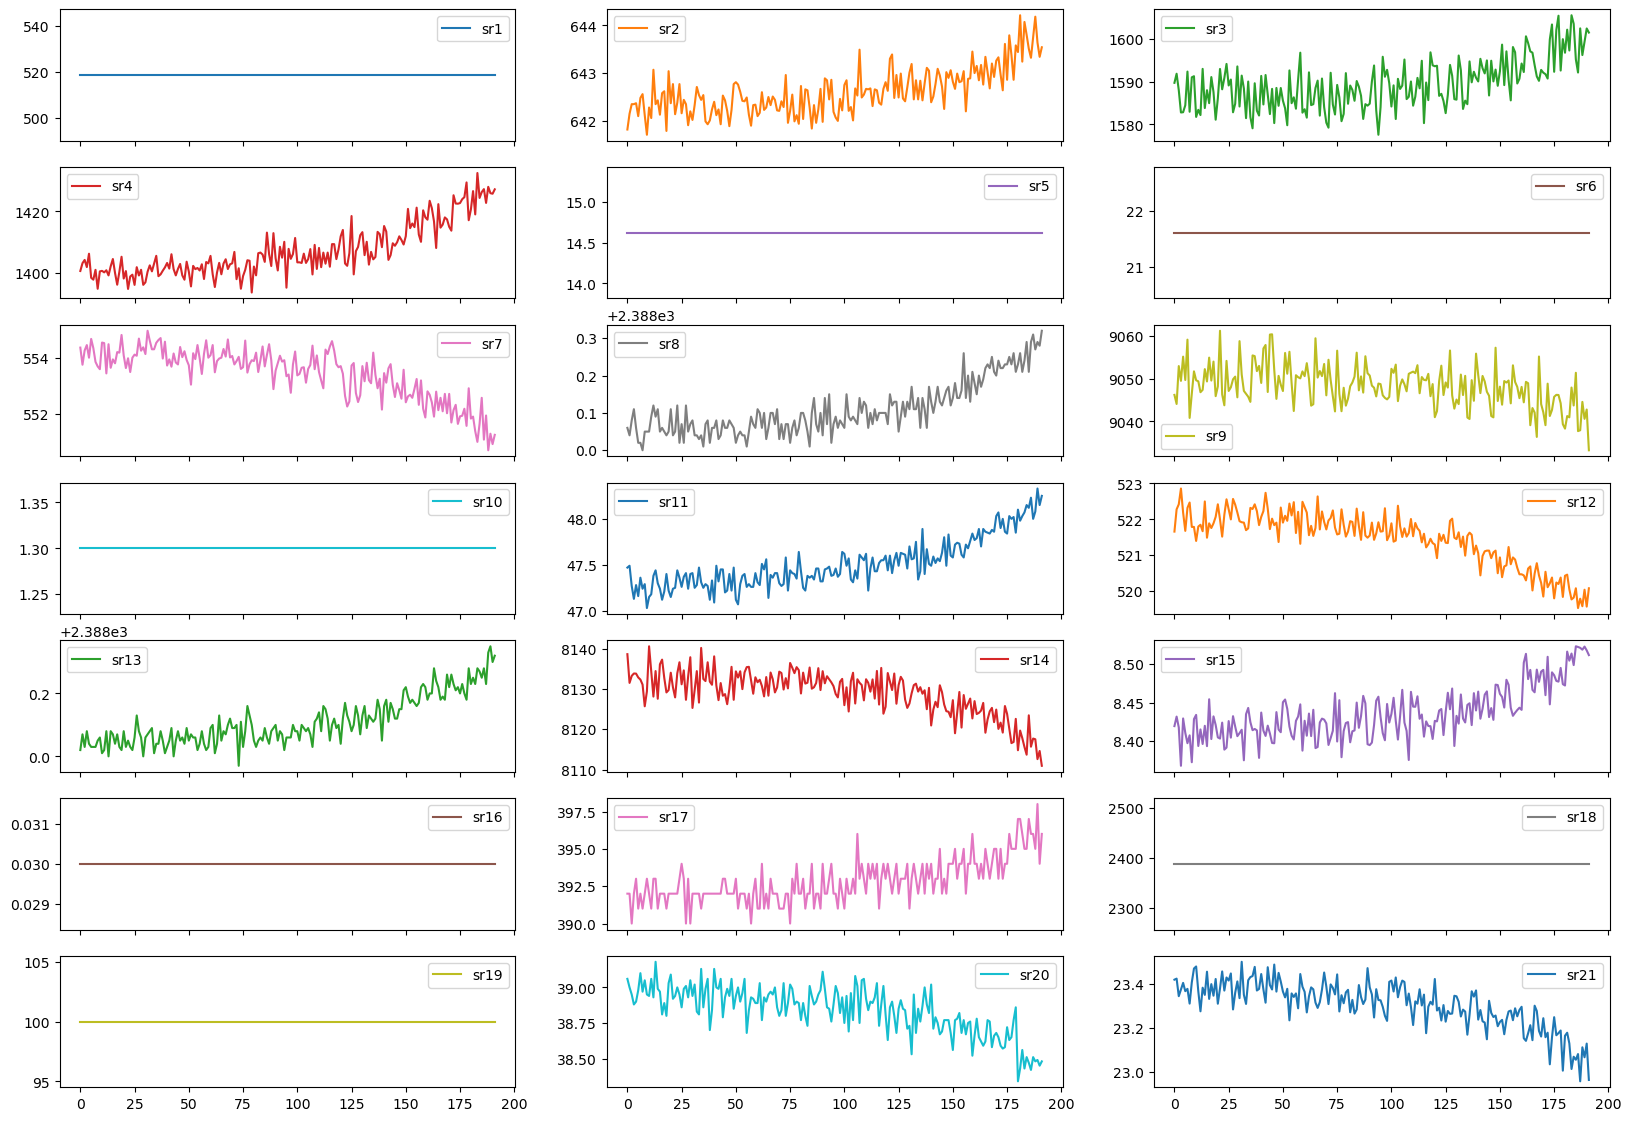

In [31]:
df_20[['sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(7, 3))

In [33]:
df.head(20)

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [51]:
max_time=df.groupby('unit')['time'].max()
max_time

unit
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time, Length: 100, dtype: int64

In [39]:
df['max_time']=df.groupby('unit')['time'].transform('max')
df.head(20)

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,192
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774,192
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106,192
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066,192
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694,192


In [45]:
df['remaining_time']=df['max_time']-df['time']
df['label']=df['remaining_time'].clip(upper=130)
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,130
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,130
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,130
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,130
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,130


<Axes: title={'center': 'unit80'}>

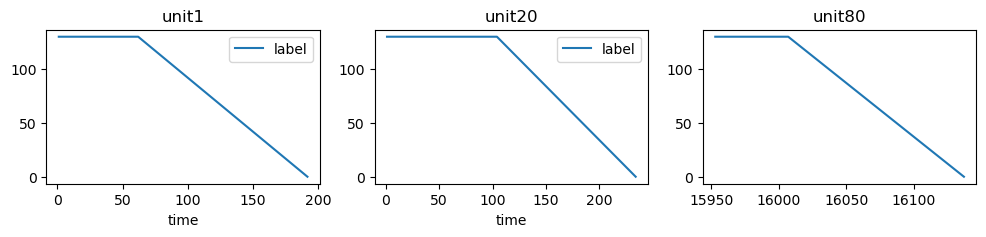

In [63]:
fig, axs=plt.subplots(1,3, figsize=(12,2))
df[df['unit']==1].plot(x='time',y='label',ax=axs[0], title='unit1')
df[df['unit']==20].plot(x='time',y='label',ax=axs[1], title='unit20')
df[df['unit']==80]['label'].plot(ax=axs[2], title='unit80')

In [73]:
window_size = 30
windows=[]
for i in range(len(df) - window_size + 1):
    window = df.iloc[i:i+window_size].copy()  # Take a slice of the window
    window['window_id'] = i  # Add window_id
    window['label']= df.iloc[i+window_size-1]['label']
    windows.append(window)
df_windows = pd.concat(windows, ignore_index=True)
df_windows.head(50)

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label,window_id
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.03,392,2388,100.0,39.06,23.4190,192,191,130.0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.03,392,2388,100.0,39.00,23.4236,192,190,130.0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.03,390,2388,100.0,38.95,23.3442,192,189,130.0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.03,392,2388,100.0,38.88,23.3739,192,188,130.0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.03,393,2388,100.0,38.90,23.4044,192,187,130.0,0
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,0.03,391,2388,100.0,38.98,23.3669,192,186,130.0,0
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,0.03,392,2388,100.0,39.10,23.3774,192,185,130.0,0
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,0.03,391,2388,100.0,38.97,23.3106,192,184,130.0,0
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,0.03,392,2388,100.0,39.05,23.4066,192,183,130.0,0
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,0.03,393,2388,100.0,38.95,23.4694,192,182,130.0,0


In [75]:
df_windows.columns

Index(['unit', 'time', 'op1', 'op2', 'op3', 'sr1', 'sr2', 'sr3', 'sr4', 'sr5',
       'sr6', 'sr7', 'sr8', 'sr9', 'sr10', 'sr11', 'sr12', 'sr13', 'sr14',
       'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21', 'max_time',
       'remaining_time', 'label', 'window_id'],
      dtype='object')

In [79]:
X=df_windows[['window_id','sr1', 'sr2', 'sr3', 'sr4', 'sr5',
       'sr6', 'sr7', 'sr8', 'sr9', 'sr10', 'sr11', 'sr12', 'sr13', 'sr14',
       'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']]
X.head(50)

,window_id,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,0,518.67,642.10,1584.47,1398.37,14.62,21.61,554.67,2388.02,9049.68,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02,9059.13,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.00,9040.80,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,0,518.67,642.12,1590.98,1394.80,14.62,21.61,553.69,2388.05,9046.46,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05,9051.70,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [81]:
y=df_windows.groupby('window_id')['label'].last()
y

window_id
0        130.0
1        130.0
2        130.0
3        130.0
4        130.0
         ...  
20597      4.0
20598      3.0
20599      2.0
20600      1.0
20601      0.0
Name: label, Length: 20602, dtype: float64

In [93]:
y[20:120]

window_id
20     130.0
21     130.0
22     130.0
23     130.0
24     130.0
       ...  
115     47.0
116     46.0
117     45.0
118     44.0
119     43.0
Name: label, Length: 100, dtype: float64

In [87]:
df_windows['window_id'].nunique()

20602

In [89]:
len(df)

20631

In [95]:
X_train=X[20:120]
y_train=y[20:120]

In [13]:
df_ops=df[[2,3,4]]
df_ops.head()

,2,3,4
0,-0.0007,-0.0004,100.0
1,0.0019,-0.0003,100.0
2,-0.0043,0.0003,100.0
3,0.0007,0.0000,100.0
4,-0.0019,-0.0002,100.0


In [15]:
df_ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       20631 non-null  float64
 1   3       20631 non-null  float64
 2   4       20631 non-null  float64
dtypes: float64(3)
memory usage: 483.7 KB


In [23]:
dfs=[]

for i in range(1,5):
    file_path=rf'C:\Users\Jiao Yuehan\Desktop\IT5006\Project_IT5006\pres\CMAPSSData\train_FD00{i}.txt'
    df=pd.read_csv(file_path, delim_whitespace=True, header=None)
    dfs.append(df[[2,3,4]])

df_ops=pd.concat(dfs, ignore_index=True)
df_ops.info()

C:\Users\Jiao Yuehan\AppData\Local\Temp\ipykernel_20668\3174064883.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\Jiao Yuehan\AppData\Local\Temp\ipykernel_20668\3174064883.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\Jiao Yuehan\AppData\Local\Temp\ipykernel_20668\3174064883.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\Jiao Yuehan\AppData\Local\Temp\ipykernel_20668\3174064883.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be rem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   2       160359 non-null  float64
 1   3       160359 non-null  float64
 2   4       160359 non-null  float64
dtypes: float64(3)
memory usage: 3.7 MB


In [25]:
df_ops.describe()

,2,3,4
count,160359.000000,160359.000000,160359.000000
mean,17.211973,0.410004,95.724344
std,16.527988,0.367938,12.359044
min,-0.008700,-0.000600,60.000000
25%,0.001300,0.000200,100.000000
50%,19.998100,0.620000,100.000000
75%,35.001500,0.840000,100.000000
max,42.008000,0.842000,100.000000


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(df_ops)
x_scaled[:5]

array([[1.90400484e-04, 2.37360551e-04, 1.00000000e+00],
       [2.52280641e-04, 3.56040826e-04, 1.00000000e+00],
       [1.04720266e-04, 1.06812248e-03, 1.00000000e+00],
       [2.23720568e-04, 7.12081652e-04, 1.00000000e+00],
       [1.61840411e-04, 4.74721101e-04, 1.00000000e+00]])

In [31]:
X=x_scaled

In [40]:
kmeans = KMeans(n_clusters=3).fit(X)

In [44]:
sse, silhouette = [], []
sse.append((k, kmeans.inertia_))

In [42]:
sse, silhouette = [], []
sse.append((k, kmeans.inertia_))
silhouette.append((k, silhouette_score(X, kmeans.labels_)))

KeyboardInterrupt: 

In [46]:
sse, silhouette = [], []

for k in tqdm(range(2, 10+1)):

    # Run K-Means for the current number of clusters k
    kmeans = KMeans(n_clusters=k).fit(X)
    
    # "inertia_" holds the sum of squared distances of samples to their closest cluster center
    # Record the current (k, sse) pair
    sse.append((k, kmeans.inertia_))
    
    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters    
    #silhouette.append((k, silhouette_score(X, kmeans.labels_)))
    
# Convert to numpy array for convenience
sse = np.array(sse)
#silhouette = np.array(silhouette) 

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 10.10it/s]


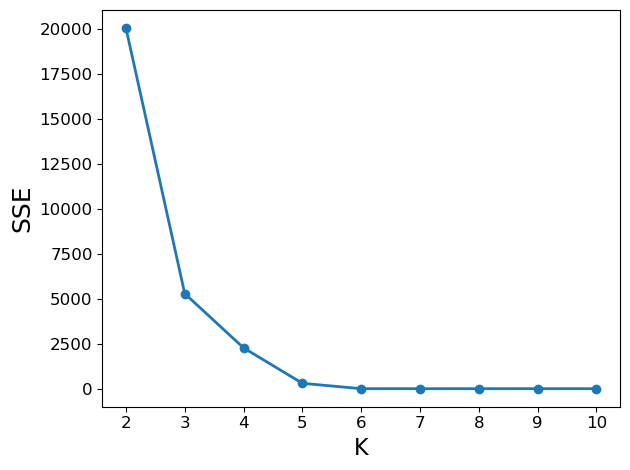

In [48]:
plt.figure()
plt.xlabel('K', fontsize=16)
plt.ylabel('SSE', fontsize=18)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.plot([s[0] for s in sse], [s[1] for s in sse], marker='o', lw=2)
plt.tight_layout()
plt.show()

In [50]:
sse

array([[2.00000000e+00, 2.00286790e+04],
       [3.00000000e+00, 5.27903409e+03],
       [4.00000000e+00, 2.26596206e+03],
       [5.00000000e+00, 2.99160354e+02],
       [6.00000000e+00, 7.79506021e-02],
       [7.00000000e+00, 6.78763988e-02],
       [8.00000000e+00, 5.15995759e-02],
       [9.00000000e+00, 4.94520920e-02],
       [1.00000000e+01, 4.00174706e-02]])

In [ ]:
plt.figure()
plt.xlabel('K', fontsize=16)
plt.ylabel('Silhouette Score', fontsize=18)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.plot([s[0] for s in silhouette], [s[1] for s in silhouette], marker='o', lw=2)
plt.tight_layout()
plt.show()

In [52]:
best_kmeans = KMeans(n_clusters=5).fit(X)

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_clusters(centers, labels, data):
    # Create a 3D scatter plot of the data points
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Unique labels
    unique_labels = np.unique(labels)
    
    # Plot each cluster
    for label in unique_labels:
        ax.scatter(data[labels == label, 0], data[labels == label, 1], data[labels == label, 2], label=f'Cluster {label}')
    
    # Plot the cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=300, c='red', label='Centroids', marker='X')
    
    ax.set_title('3D K-means Clustering')
    ax.set_xlabel('Operation 1')
    ax.set_ylabel('Operation 2')
    ax.set_zlabel('Operation 3')
    ax.legend()
    plt.show()

# Example usage
# plot_clusters_3d(best_kmeans.cluster_centers_, best_kmeans.labels_, X)


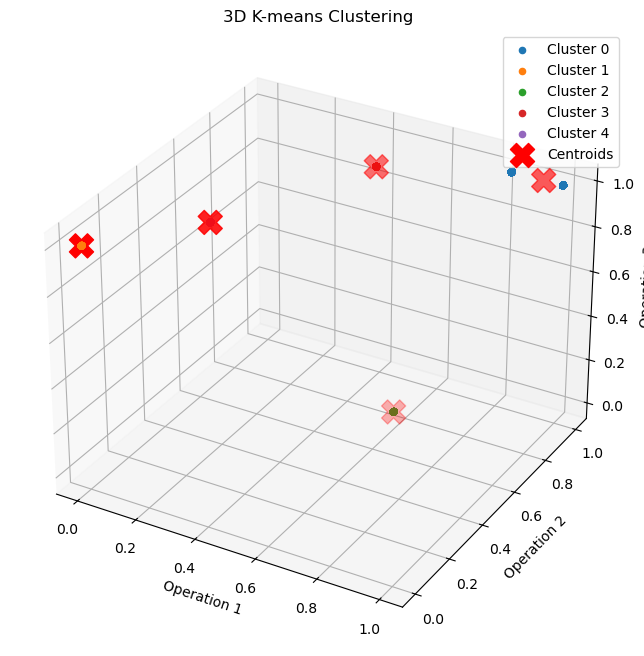

In [66]:
plot_clusters(best_kmeans.cluster_centers_, best_kmeans.labels_, X)